In [1]:
pip install pyalex networkx matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import pyalex
from pyalex import Works, Institutions, Topics
from collections import Counter
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import chain
import numpy as np
import scipy
pyalex.config.email = "aymann.mhammedi@gmail.com"

In [3]:
# Fetch a list of topics
topics = Topics().get()

# Print the list of topics with their IDs and display names
for topic in topics:
    print(f"ID: {topic['id']}, Display Name: {topic['display_name']}, Description: {topic['description']}")

ID: https://openalex.org/T11881, Display Name: Crystallization and Solubility Studies, Description: This cluster of papers focuses on the crystallization processes and control, including topics such as nucleation, solubility, polymorphism, ultrasound-assisted crystallization, process analytical technology, crystal growth, pharmaceutical crystallization, continuous crystallization, and crystal engineering.
ID: https://openalex.org/T11475, Display Name: French Urban and Social Studies, Description: This cluster of papers explores the intersection of territorial governance, environmental participation, and sustainable development. It delves into topics such as citizen participation, local development, social justice, and community engagement in the context of rural territories. The papers also discuss the role of proximity and innovation in shaping public policy for sustainable and inclusive development.
ID: https://openalex.org/T13445, Display Name: American Constitutional Law and Politi

In [4]:
# Define the filter criteria for works published in the USA in 2015
filter_criteria = {
    "publication_year": 2015,  # Filter for works published in 2015
    "institutions": {"country_code": "us"},
    "primary_location": {"source": {"type": "journal"}},  # Filter for journal articles
    #"primary_topic": {"domain": {"id": 4}},  # Filter for Health science
    "primary_topic": {"subfield": {"id": 2740}},  # Filter for Pulmonary and Respiratory Medicine
}

# Fetch the works with pagination
query = Works().filter(**filter_criteria)
all_works_2015 = list(chain.from_iterable(query.paginate(per_page=200, n_max=None)))  # Adjust per_page as needed, n_max=None for all papers (heavy)

# Count the number of works
num_works = len(all_works_2015)

# Print the number of works
print(f"Number of works published in the USA in 2015: {num_works}")

# Optionally, print the first few works to verify
for work in all_works_2015[:5]:  # Print the first 5 works as an example
    print(f"ID: {work['id']}, Title: {work['title']}, Publication Year: {work['publication_year']}")

Number of works published in the USA in 2015: 17294
ID: https://openalex.org/W2222086386, Title: Nivolumab versus Everolimus in Advanced Renal-Cell Carcinoma, Publication Year: 2015
ID: https://openalex.org/W2251438188, Title: The 2015 World Health Organization Classification of Lung Tumors, Publication Year: 2015
ID: https://openalex.org/W1578291413, Title: Integrative Clinical Genomics of Advanced Prostate Cancer, Publication Year: 2015
ID: https://openalex.org/W2161112598, Title: The Molecular Taxonomy of Primary Prostate Cancer, Publication Year: 2015
ID: https://openalex.org/W1107917109, Title: The prognostic landscape of genes and infiltrating immune cells across human cancers, Publication Year: 2015


In [5]:
# Count the number of unique work IDs
unique_work_ids = len(set(work['id'] for work in all_works_2015))

# Print the result
print(f"Number of unique work IDs: {unique_work_ids}")

Number of unique work IDs: 17294


COAUTHORSHIP

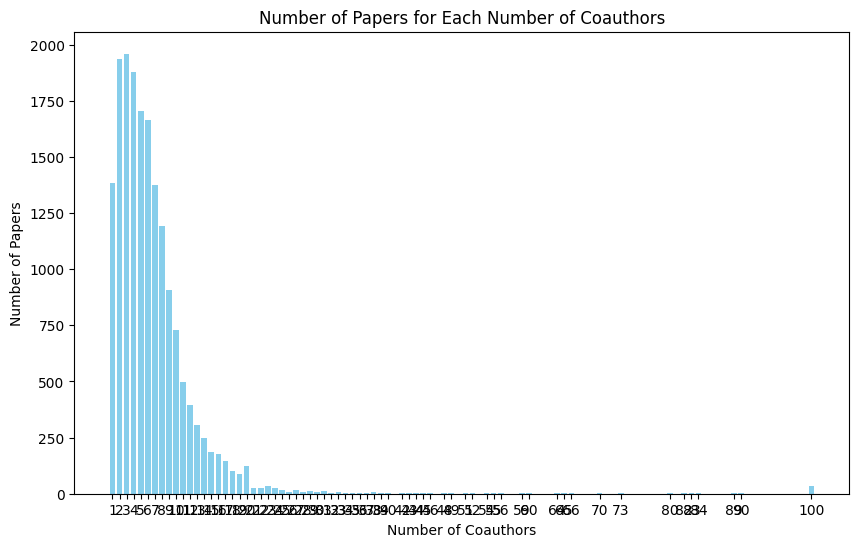

In [6]:
# Count the number of coauthors for each work
coauthor_counts = Counter(len(work['authorships']) for work in all_works_2015)

# Prepare data for plotting
coauthor_numbers = list(coauthor_counts.keys())
paper_counts = list(coauthor_counts.values())

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(coauthor_numbers, paper_counts, color='skyblue')
plt.xlabel('Number of Coauthors')
plt.ylabel('Number of Papers')
plt.title('Number of Papers for Each Number of Coauthors')
plt.xticks(coauthor_numbers)
plt.show()

In [7]:
# Count the number of authors for each work and store in all_works_2015
for work in all_works_2015:
    work['num_authors'] = len(work['authorships'])
#get total number of authors
total_coauthors = sum(work['num_authors'] for work in all_works_2015)
#get total of unique authors
unique_authors = set()
for work in all_works_2015:
    for author in work['authorships']:
        unique_authors.add(author['author']['id'])
mean_coauthors = total_coauthors / num_works

print(f"Total number of authors: {total_coauthors}")
print(f"Total number of unique authors: {len(unique_authors)}")
print(f"Mean number of coauthors per paper: {mean_coauthors:.2f}")


Total number of authors: 114876
Total number of unique authors: 69611
Mean number of coauthors per paper: 6.64


In [14]:
all_works_2015[0]['authorships'][0]['countries']

['US']

In [9]:
# Get total number of unique institutions
unique_institutions = set()
for work in all_works_2015:
    for author in work['authorships']:
        for institution in author['institutions']:
            unique_institutions.add(institution['id'])
print(f"Total number of unique institutions: {len(unique_institutions)}")

Total number of unique institutions: 7635


Text(0.5, 0, 'Number of Institutions')

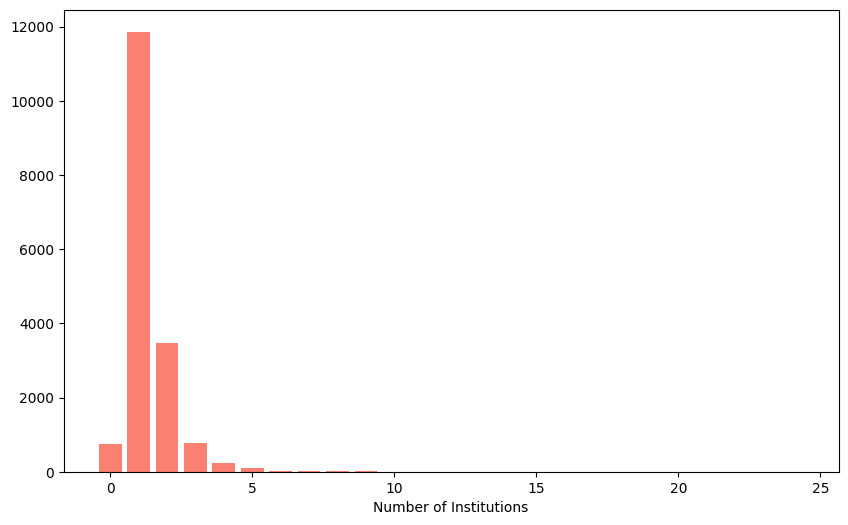

In [10]:
# Plot number of unique institutions per paper
institution_counts = Counter(len(work['authorships'][0]['institutions']) for work in all_works_2015)
institution_numbers = list(institution_counts.keys())
institution_paper_counts = list(institution_counts.values())
plt.figure(figsize=(10, 6))
plt.bar(institution_numbers, institution_paper_counts, color='salmon')
plt.xlabel('Number of Institutions')

In [35]:
# For each work generate dummy variable if at least one coauthor is from china, add it to all_works_2015
for work in all_works_2015:
    work['has_chinese_coauthor'] = any('CN' in author['countries'] for author in work['authorships'])
# Count the number of works with at least one Chinese coauthor
num_works_with_chinese_coauthor = sum(work['has_chinese_coauthor'] for work in all_works_2015)
print(f"Number of works with at least one Chinese coauthor: {num_works_with_chinese_coauthor}")
print(f"Percentage of works with at least one Chinese coauthor: {num_works_with_chinese_coauthor / num_works * 100:.2f}%")

Number of works with at least one Chinese coauthor: 570
Percentage of works with at least one Chinese coauthor: 2.49%


In [18]:
# Count the number of Chinese coauthors
chinese_coauthors = sum(
    1
    for work in all_works_2015
    for authorship in work['authorships']
    for inst in authorship.get('institutions', [])
    if inst.get('country_code') == 'CN'
)

# Print the result
print(f"Number of Chinese coauthors: {chinese_coauthors}")

Number of Chinese coauthors: 3876


In [19]:
#For each work generate dummy variable if all authors are from USA, add it to all_works_2015
for work in all_works_2015:
    work['all_authors_from_usa'] = all('US' in author['countries'] for author in work['authorships'])
# Count the number of works with all authors from the USA
num_works_all_authors_from_usa = sum(work['all_authors_from_usa'] for work in all_works_2015)
print(f"Number of works with all authors from the USA: {num_works_all_authors_from_usa}")

Number of works with all authors from the USA: 11974


QUALITY OF RESEARCH

In [22]:
# Get min max mean and deciles of cited_by_count
cited_by_counts = [work['cited_by_count'] for work in all_works_2015]
min_cited_by_count = min(cited_by_counts)
max_cited_by_count = max(cited_by_counts)
mean_cited_by_count = np.mean(cited_by_counts)
deciles = np.percentile(cited_by_counts, np.arange(0, 101, 10))
print(f"Min cited_by_count: {min_cited_by_count}")
print(f"Max cited_by_count: {max_cited_by_count}")
print(f"Mean cited_by_count: {mean_cited_by_count:.2f}")
print(f"Deciles of cited_by_count: {deciles}")

Min cited_by_count: 0
Max cited_by_count: 5347
Mean cited_by_count: 30.18
Deciles of cited_by_count: [0.000e+00 0.000e+00 0.000e+00 1.000e+00 3.000e+00 7.000e+00 1.300e+01
 2.200e+01 3.600e+01 6.600e+01 5.347e+03]


<BarContainer object of 442 artists>

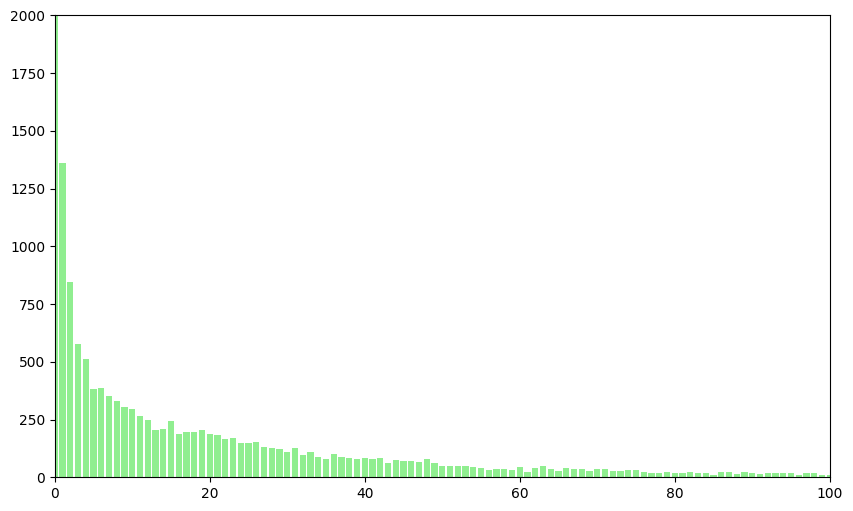

In [26]:
# Distribution of citations per paper
citations_counts = Counter(work['cited_by_count'] for work in all_works_2015)
# Prepare data for plotting
citation_numbers = list(citations_counts.keys())
citation_paper_counts = list(citations_counts.values())
# Plot the data
plt.figure(figsize=(10, 6))
plt.xlim(0, 100)
plt.ylim(0, 2000)
plt.bar(citation_numbers, citation_paper_counts, color='lightgreen')

In [28]:
#Mean citations for paperss with and without Chinese coauthors
mean_citations_with_chinese = np.mean([work['cited_by_count'] for work in all_works_2015 if work['has_chinese_coauthor']])
mean_citations_without_chinese = np.mean([work['cited_by_count'] for work in all_works_2015 if not work['has_chinese_coauthor']])
print(f"Mean citations for papers with Chinese coauthors: {mean_citations_with_chinese:.2f}")
print(f"Mean citations for papers without Chinese coauthors: {mean_citations_without_chinese:.2f}")

Mean citations for papers with Chinese coauthors: 48.31
Mean citations for papers without Chinese coauthors: 29.56


EXPOSURE TO POLICY

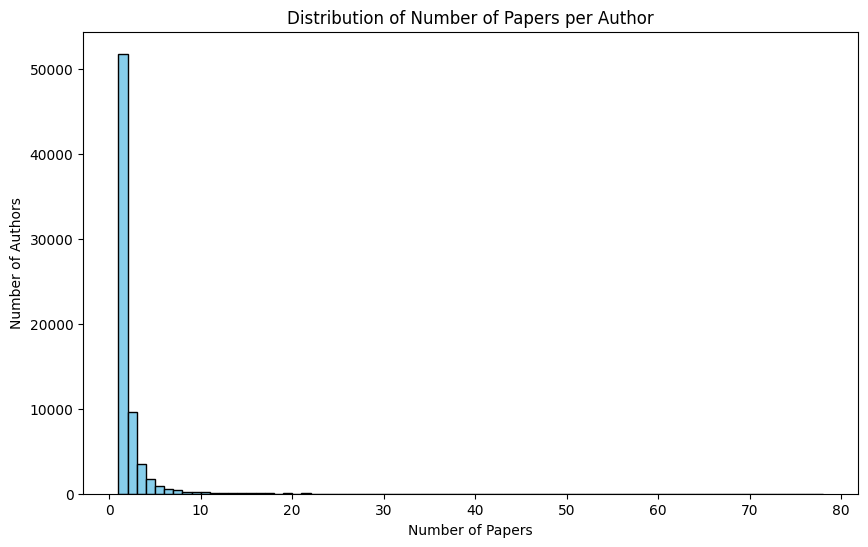

In [29]:
# Count the number of papers per author
author_paper_counts = Counter(
    authorship['author']['id']
    for work in all_works_2015
    for authorship in work['authorships']
)

# Prepare data for plotting
authors = list(author_paper_counts.keys())
paper_counts = list(author_paper_counts.values())

# Plot the data
plt.figure(figsize=(10, 6))
plt.hist(paper_counts, bins=range(1, max(paper_counts) + 2), color='skyblue', edgecolor='black')
plt.xlabel('Number of Papers')
plt.ylabel('Number of Authors')
plt.title('Distribution of Number of Papers per Author')
plt.show()

Text(0.5, 1.0, 'Distribution of Share of Papers with Chinese Coauthors for US Authors')

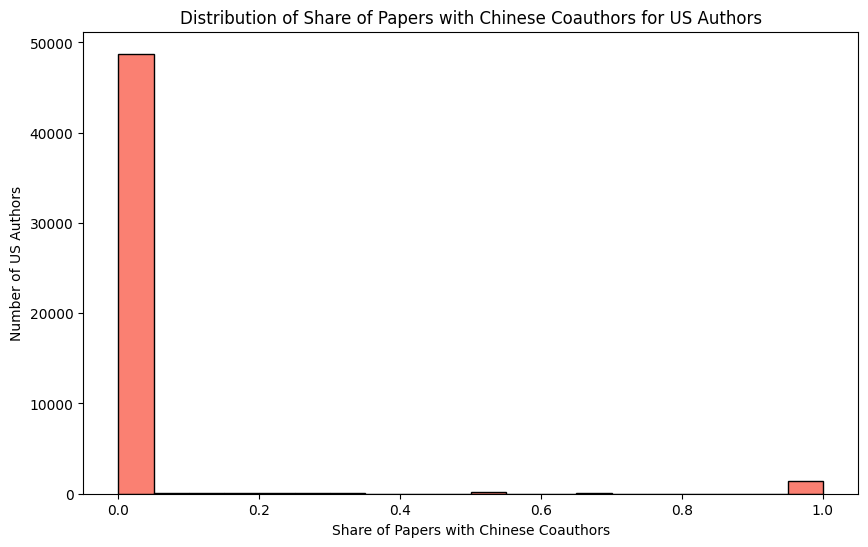

In [31]:
# For each US author compute share of papers with Chinese coauthors
for work in all_works_2015:
    for authorship in work['authorships']:
        if 'US' in authorship['countries']:
            authorship['has_chinese_coauthor'] = any('CN' in author['countries'] for author in work['authorships'])
# Count the number of papers for each US author
us_author_paper_counts = defaultdict(int)
for work in all_works_2015:
    for authorship in work['authorships']:
        if 'US' in authorship['countries']:
            us_author_paper_counts[authorship['author']['id']] += 1
# Compute the share of papers with Chinese coauthors for each US author
us_author_chinese_coauthor_counts = defaultdict(int)
for work in all_works_2015:
    for authorship in work['authorships']:
        if 'US' in authorship['countries'] and authorship.get('has_chinese_coauthor'):
            us_author_chinese_coauthor_counts[authorship['author']['id']] += 1
# Compute the share of papers with Chinese coauthors for each US author
us_author_shares = {
    author_id: us_author_chinese_coauthor_counts[author_id] / count
    for author_id, count in us_author_paper_counts.items()
}
# Prepare data for plotting
us_author_ids = list(us_author_shares.keys())
us_author_share_values = list(us_author_shares.values())
# Plot the data
plt.figure(figsize=(10, 6))
plt.hist(us_author_share_values, bins=20, color='salmon', edgecolor='black')
plt.xlabel('Share of Papers with Chinese Coauthors')
plt.ylabel('Number of US Authors')
plt.title('Distribution of Share of Papers with Chinese Coauthors for US Authors')

In [32]:
#List US authors with share of papers with Chinese coauthors > 0.5
high_share_authors = [author_id for author_id, share in us_author_shares.items() if share > 0.5]

CHINA INITIATIVE

In [33]:
# Define the filter criteria for works published in the USA in 2020
filter_criteria = {
    "publication_year": 2020,  # Filter for works published in 2020
    "institutions": {"country_code": "us"},
    "primary_location": {"source": {"type": "journal"}},  # Filter for journal articles
    #"primary_topic": {"domain": {"id": 4}},  # Filter for Health science
    "primary_topic": {"subfield": {"id": 2740}},  # Filter for Pulmonary and Respiratory Medicine
}

# Fetch the works with pagination
query = Works().filter(**filter_criteria)
all_works_2020 = list(chain.from_iterable(query.paginate(per_page=200, n_max=None)))  # Adjust per_page as needed, n_max=None for all papers (heavy)

# Count the number of works
num_works = len(all_works_2020)

# Print the number of works
print(f"Number of works published in the USA in 2020: {num_works}")

# Optionally, print the first few works to verify
for work in all_works_2020[:5]:  # Print the first 5 works as an example
    print(f"ID: {work['id']}, Title: {work['title']}, Publication Year: {work['publication_year']}")

Number of works published in the USA in 2020: 22904
ID: https://openalex.org/W3013816672, Title: Covid-19 in Critically Ill Patients in the Seattle Region — Case Series, Publication Year: 2020
ID: https://openalex.org/W3003415550, Title: Reduced Lung-Cancer Mortality with Volume CT Screening in a Randomized Trial, Publication Year: 2020
ID: https://openalex.org/W3108493784, Title: Ferroptosis: molecular mechanisms and health implications, Publication Year: 2020
ID: https://openalex.org/W3014271510, Title: Respiratory virus shedding in exhaled breath and efficacy of face masks, Publication Year: 2020
ID: https://openalex.org/W3033438356, Title: Prevalence and attributable health burden of chronic respiratory diseases, 1990–2017: a systematic analysis for the Global Burden of Disease Study 2017, Publication Year: 2020


In [37]:
# For each work generate dummy variable if at least one coauthor is from china, add it to all_works_2020
for work in all_works_2020:
    work['has_chinese_coauthor'] = any('CN' in author['countries'] for author in work['authorships'])
# Count the number of works with at least one Chinese coauthor
num_works_with_chinese_coauthor = sum(work['has_chinese_coauthor'] for work in all_works_2020)
print(f"Number of works with at least one Chinese coauthor: {num_works_with_chinese_coauthor}")
print(f"Percentage of works with at least one Chinese coauthor: {num_works_with_chinese_coauthor / num_works * 100:.2f}%")

Number of works with at least one Chinese coauthor: 1167
Percentage of works with at least one Chinese coauthor: 5.10%


SURPLUS

In [ ]:
# Extract all unique country codes of co-authors
country_codes = set(
    inst.get('country_code') 
    for work in all_works_2015 
    for authorship in work['authorships'] 
    for inst in authorship.get('institutions', []) 
    if 'country_code' in inst
)

# Print the unique country codes
print(f"Different country codes of co-authors: {country_codes}")

Different country codes of co-authors: {'GT', 'TH', 'CL', 'ET', 'MN', 'BR', 'RO', 'IL', 'PT', 'CU', 'GI', 'DO', 'KG', 'FR', 'GB', 'HU', 'AO', 'DE', 'MU', 'SK', 'IS', 'ZA', 'PR', 'RU', 'KE', 'HK', 'DM', 'ML', 'AR', 'BO', 'RW', 'CH', 'EE', 'LB', 'NP', 'GE', 'SA', 'BA', 'NZ', 'PF', 'BD', 'JM', 'LK', 'LI', 'VN', 'CW', 'YE', 'CZ', 'TN', 'PE', 'KR', 'AM', 'EG', 'PS', 'HR', 'OM', None, 'ES', 'SI', 'GR', 'BY', 'PL', 'LT', 'RS', 'SG', 'CR', 'ID', 'PA', 'GD', 'US', 'TW', 'SD', 'FI', 'QA', 'TD', 'NA', 'MO', 'IQ', 'MX', 'LV', 'MW', 'GH', 'AU', 'TZ', 'CY', 'JO', 'MM', 'SS', 'AG', 'NO', 'BG', 'PK', 'AL', 'UG', 'SN', 'TR', 'PY', 'BB', 'BE', 'LU', 'AE', 'MT', 'KY', 'TT', 'DK', 'EC', 'GL', 'AT', 'DZ', 'CA', 'LY', 'KW', 'IN', 'KZ', 'BH', 'GA', 'CN', 'MY', 'HN', 'MK', 'SE', 'JP', 'NL', 'VE', 'IR', 'NG', 'MQ', 'SY', 'XK', 'IT', 'KH', 'IE', 'MA', 'PH', 'UY', 'CO', 'UA'}


In [ ]:
# Count institutions in the US and outside the US
us_institutions = set(
    inst['id']
    for work in all_works_2015
    for authorship in work['authorships']
    for inst in authorship.get('institutions', [])
    if inst.get('country_code') == 'US'
)

non_us_institutions = set(
    inst['id']
    for work in all_works_2015
    for authorship in work['authorships']
    for inst in authorship.get('institutions', [])
    if inst.get('country_code') != 'US'
)

cn_institutions = set(
    inst['id']
    for work in all_works_2015
    for authorship in work['authorships']
    for inst in authorship.get('institutions', [])
    if inst.get('country_code') == 'CN'
)

# Print the results
print(f"Number of institutions in the US: {len(us_institutions)}")
print(f"Number of institutions outside the US: {len(non_us_institutions)}")
print(f"Number of institutions in China: {len(cn_institutions)}")

Number of institutions in the US: 3256
Number of institutions outside the US: 4379
Number of institutions in China: 341
